# Binary classification
An Attempt to build and train model to predict whether it's move or not move during each frame

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

def create_2dcnn_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Припустимий розмір вхідного зображення (висота, ширина, канали)
input_shape = (180, 320, 3)  # Змініть розмір згідно з вашими потребами

# Створити модель
model = create_2dcnn_model(input_shape)

# Вивести опис моделі
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 318, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 178, 318, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 159, 32)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 157, 64)       18496     
                                                                 
 batch_normalization_1 (Bat  (None, 87, 157, 64)       256       
 chNormalization)                                                
                                                        

In [ ]:
from google.colab import drive
import numpy as np

drive.mount('/content/drive')

prep_frames = np.load('/content/drive/My Drive/preparation_frames.npy')
prep_classes = np.load('/content/drive/My Drive/preparation_classes.npy')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
prep_frames.shape

(3000, 180, 320, 3)

In [ ]:
prep_frames = prep_frames / 255.0

In [ ]:
prep_frames, prep_classes = shuffle_data(prep_frames, prep_classes)

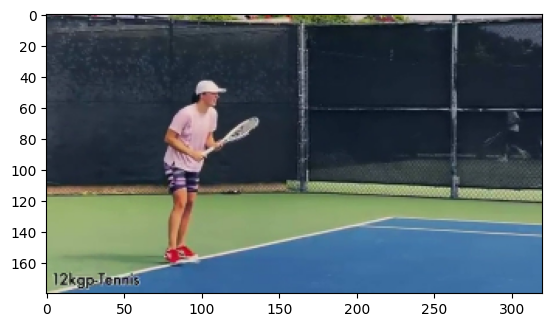

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(prep_frames[1508])

In [ ]:
prep_classes[1503]

1

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(prep_frames, prep_classes, test_size=0.2, random_state=42)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_val, y_val))

Epoch 1/10
150/150 [==============================] - 8s 52ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
150/150 [==============================] - 7s 47ms/step - loss: 9.3820e-32 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
150/150 [==============================] - 7s 46ms/step - loss: 0.0244 - accuracy: 0.9996 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
150/150 [==============================] - 7s 47ms/step - loss: 0.9693 - accuracy: 0.9971 - val_loss: 135.1705 - val_accuracy: 0.9200
Epoch 5/10
150/150 [==============================] - 7s 46ms/step - loss: 5.7344 - accuracy: 0.9921 - val_loss: 2.0902 - val_accuracy: 0.9917
Epoch 6/10
150/150 [==============================] - 7s 46ms/step - loss: 0.9487 - accuracy: 0.9979 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
150/150 [==============================] - 7s 46ms/step - loss: 12.6942 - accuracy: 0.9900 - val_loss: 0.

In [ ]:
# from keras.models import load_model

# model = load_model('prep_model')

In [ ]:
def predict_model(image):
    score = model.predict(np.array([image]), verbose=0)
    if score > 0.5:
      score = 1
    else:
      score = 0
    return score

In [ ]:
from sklearn.metrics import accuracy_score

pred = []
for i in range(len(X_val)):
    pred.append(predict_model(X_val[i]))

train_accuracy = accuracy_score(y_val, pred)
# rgb8_test_accuracy = accuracy_score(rgb8_test_true_labels, rgb8_test_predictions)
# rgb8_val_accuracy = accuracy_score(rgb8_val_true_labels, rgb8_val_predictions)

print("Train Accuracy:", train_accuracy)
# print("Test Accuracy:", rgb8_test_accuracy)
# print("Val Accuracy:", rgb8_val_accuracy)

Train Accuracy: 1.0


In [ ]:
import shutil
from google.colab import files

shutil.make_archive('prep_model', 'zip', 'prep_model')
files.download('prep_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.save('prep_model.h5')
model.save('prep_model.keras')
model.save('prep_model')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
